****Exploratory Data Analysis of Paul Morphy's Games on Chess.com****

In [326]:
# I have two files whitegames.csv, blackgames.csv each with 377 games.
# TODO:
# Clean the data
    # Separate some data into its own columns
# Feature engineering
# Exploratory analysis:
    # Charts, histograms
    # Pivot tables
    # Heat map
    # Openings analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

white_games = pd.read_csv(r'C:\Users\debor\PycharmProjects\chessgames\whitegames.csv')
white_games.head()

,Players,Opening,Result,Moves,Year
0,Paul Morphy (2690) Morphy Ernest,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 Giuoco Piano Ga...,1-0,20,1849
1,Paul Morphy (2690) Mcconell L Honorary,1. e4 e5 2. f4 exf4 3. Nf3 g5 King's Gambit Ac...,1-0,29,1849
2,Paul Morphy (2690) Morphy A,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 Giuoco Piano Ga...,1-0,21,1849
3,Paul Morphy (2690) Morphy A,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 Giuoco Piano Ga...,1-0,46,1849
4,Paul Morphy (2690) Rousseau Emmanuel,1. e4 e5 2. f4 exf4 3. Nf3 g5 King's Gambit Ac...,1-0,17,1849


In [327]:
black_games = pd.read_csv(r'C:\Users\debor\PycharmProjects\chessgames\blackgames.csv')
black_games.head()        

,Players,Opening,Result,Moves,Year
0,Fiske Paul Morphy (2690),1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 Italian Game: K...,1-0,49,1857
1,Louis Paulsen (2550) Paul Morphy (2690),1. e4 e5 2. Nf3 Nc6 3. Nc3 Bc5 Three Knights O...,1-0,34,1857
2,John W Schulten (2335) Paul Morphy (2690),1. e4 e5 2. f4 d5 3. exd5 e4 King's Gambit Dec...,1-0,18,1857
3,Charles Stanley (2380) Paul Morphy (2690),1. e4 e5 2. f4 exf4 3. Bc4 Qh4+ King's Gambit ...,1-0,20,1857
4,Samuel S Boden (2470) Paul Morphy (2690),1. e4 e5 2. Nf3 d6 3. d4 exd4 Philidor Defense...,1-0,41,1858


In [328]:
print('Shape of white_games.csv:', white_games.shape)
print('Shape of black_games.csv:', black_games.shape)

Shape of white_games.csv: (377, 5)
Shape of black_games.csv: (377, 5)


In [329]:
white_games.describe(), black_games.describe()

(            Moves         Year
 count  377.000000   377.000000
 mean    32.254642  1483.305040
 std     12.781673   746.333848
 min     10.000000     0.000000
 25%     23.000000  1855.000000
 50%     29.000000  1858.000000
 75%     39.000000  1858.000000
 max     80.000000  1869.000000,
             Moves         Year
 count  377.000000   377.000000
 mean    32.254642  1483.305040
 std     12.781673   746.333848
 min     10.000000     0.000000
 25%     23.000000  1855.000000
 50%     29.000000  1858.000000
 75%     39.000000  1858.000000
 max     80.000000  1869.000000)

I realized that although chess.com states there are exactly 243 games as white and 134 games as black, for a sum of 
377 games, for some reason both csv files contains 377 rows of games. This is obviously not right. After investigation, 
it seems that after the 243th game under the filter of Rating (White), chess.com posts other games until there are 
377 games. So, I'm going to just take the 243 rows of data in whitegames.csv and 134 rows in blackgames.csv

In [330]:
white_games = white_games.loc[0:242]
black_games = black_games.loc[0:133]

white_games.shape, black_games.shape

((243, 5), (134, 5))

***Cleaning and feature engineering***

In [331]:
# Going to separate the Players columns into White, Black, Morphy Rating, Opponent Rating

# In white_games.csv, the opponent name and rating is always listed second, after Morphy
# In black_games.csv, Morphy's rating is listed second, if there's an opponent rating.


# only returns words, filters out elements containing digits.
def return_alpha(x):
    new_list = []
    for i in range(len(x)):
        if x[i].isalpha():
            new_list.append(x[i])
    return new_list

# returns opponent's name as a string
def get_opponent_name(x):
    words = x.replace('(', '').replace(')', '')
    words = words.split(' ')
    words.remove('Paul')
    words.remove('Morphy') 
    opponent_name = [word for word in return_alpha(words)]
    return ' '.join(opponent_name)

# returns two arrays for each the first player's ratings and the second player's ratings
# color (str) : white if Morphy plays white.
def get_ratings(players, color):
    ratings_1 = []
    ratings_2 = []
    for i in range(len(players)):
        words = players[i]
        
        words = words.replace('(', '').replace(')', '') # remove the (,) characters
        words = words.split(' ') # split into a list
        ratings = filter(lambda x : x.isdigit(), words) # filter out non-digit text
        ratings = ' '.join(ratings).split(' ') # turn filter object into a string then split into a list
        if len(ratings) > 1:
            ratings_1.append(ratings[0])
            ratings_2.append(ratings[1])
        else: 
            # if only one rating shows up, we know it's Morphy's, so check if he played white or black
            if color == 'white':
                ratings_1.append(ratings[0])
                ratings_2.append(0) # rating of 0 means rating unavailable
            else:
                ratings_1.append(0)
                ratings_2.append(ratings[0])
    return ratings_1, ratings_2

# modify white_games
white_games['White'] = 'Paul Morphy'
white_games['Black'] = [get_opponent_name(x) for x in white_games['Players']]
white_games["Morphy's rating"] , white_games["Opponent's rating"] = get_ratings(white_games['Players'], 'white')

# modify black_games
black_games['White'] = [get_opponent_name(x) for x in black_games['Players']]
black_games['Black'] = 'Paul Morphy'
black_games["Opponent's rating"], black_games["Morphy's rating"] = get_ratings(black_games['Players'], 'black')

In [332]:
# The values in the columns Morphy's rating and Opponent's rating are as strings. We want them as integers so we can easily
# analyze it.
# Convert columns Morphy's rating and Opponent's rating to integers.
white_games = white_games.astype({"Morphy's rating":'int', "Opponent's rating":'int'})
black_games = black_games.astype({"Morphy's rating":'int', "Opponent's rating":'int'})

In [333]:
# Separate the opening moves and opening name/variation in Opening column.
def get_opening_components(x):
    opening_moves = []
    opening_name = []
    for i in range(len(x)):
        opening = x[i]
        opening = opening.split(' ')
        opening_moves.append(' '.join(opening[0:9]))
        name = ' '.join(opening[10:])
        
        # clean opening_name
        name = re.sub(r'\,.*',"", name).strip()
        opening_name.append(name)
        
    return opening_moves, opening_name

# We need to convert all the ratings 1/2 to a float 0.5 and convert ratings 1 and 0, which are strings, to floats.
def convert_to_float(x):
    if x == '1' or x == '0': 
        return float(x)
    else:
        return 0.5
    
# Parse opening moves and opening name into new separate columns
white_games['Opening moves'], white_games['Opening name'] = get_opening_components(white_games['Opening'])
black_games['Opening moves'], black_games['Opening name'] = get_opening_components(black_games['Opening'])

# Instead of a Result column, make a new column named Won where values 1 = Morphy won, 0 = Opponent won, 1/2 = draw
# 1-0 means White won and 0-1 means Black won. So for white_games, just take the first character of each result.
# For black_games, take the third character.
white_games['Won'] = [x[0] for x in white_games['Result']]
black_games['Won'] = [x[2] for x in black_games['Result']]

# Convert Won column to floats  
white_games['Won'] = white_games['Won'].apply(convert_to_float)
black_games['Won'] = black_games['Won'].apply(convert_to_float)

# Drop columns Players, Opening, Result
white_games = white_games.drop(columns = ['Players', 'Opening', 'Result'], axis = 1)
black_games = black_games.drop(columns = ['Players', 'Opening', 'Result'], axis = 1)

# Create column Color to indicate what color Morphy played for that game
white_games['Color'] = 'White'
black_games['Color'] = 'Black'

# Create column Opponent to indicate the opponent Morphy played (for ease of analysis later on)
white_games['Opponent'] = white_games['Black']
black_games['Opponent'] = black_games['White']

white_games.head()

,Moves,Year,White,Black,Morphy's rating,Opponent's rating,Opening moves,Opening name,Won,Color,Opponent
0,20,1849,Paul Morphy,Morphy Ernest,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Main Line,1.0,White,Morphy Ernest
1,29,1849,Paul Morphy,Mcconell L Honorary,2690,0,1. e4 e5 2. f4 exf4 3. Nf3 g5,Gambit Accepted: Kieseritzky,1.0,White,Mcconell L Honorary
2,21,1849,Paul Morphy,Morphy A,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Evans Accepted,1.0,White,Morphy A
3,46,1849,Paul Morphy,Morphy A,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Evans Accepted,1.0,White,Morphy A
4,17,1849,Paul Morphy,Rousseau Emmanuel,2690,0,1. e4 e5 2. f4 exf4 3. Nf3 g5,Gambit Accepted: Allgaier Gambit,1.0,White,Rousseau Emmanuel


In [334]:
black_games.head()

,Moves,Year,White,Black,Opponent's rating,Morphy's rating,Opening moves,Opening name,Won,Color,Opponent
0,49,1857,Fiske,Paul Morphy,0,2690,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6,Game: Knight Attack,0.0,Black,Fiske
1,34,1857,Louis Paulsen,Paul Morphy,2550,2690,1. e4 e5 2. Nf3 Nc6 3. Nc3 Bc5,Knights Opening,0.0,Black,Louis Paulsen
2,18,1857,John W Schulten,Paul Morphy,2335,2690,1. e4 e5 2. f4 d5 3. exd5 e4,Gambit Declined: Falkbeer Accepted,0.0,Black,John W Schulten
3,20,1857,Charles Stanley,Paul Morphy,2380,2690,1. e4 e5 2. f4 exf4 3. Bc4 Qh4+,Gambit Accepted: Bishop's Gambit,0.0,Black,Charles Stanley
4,41,1858,Samuel S Boden,Paul Morphy,2470,2690,1. e4 e5 2. Nf3 d6 3. d4 exd4,Defense: Exchange,0.0,Black,Samuel S Boden


Yay! Now we can combine the two datasets into one called, games.

In [335]:
games = pd.concat([white_games, black_games])
games.reset_index(drop = True, inplace = True) # to prevent duplicate indexing
games.head()

,Moves,Year,White,Black,Morphy's rating,Opponent's rating,Opening moves,Opening name,Won,Color,Opponent
0,20,1849,Paul Morphy,Morphy Ernest,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Main Line,1.0,White,Morphy Ernest
1,29,1849,Paul Morphy,Mcconell L Honorary,2690,0,1. e4 e5 2. f4 exf4 3. Nf3 g5,Gambit Accepted: Kieseritzky,1.0,White,Mcconell L Honorary
2,21,1849,Paul Morphy,Morphy A,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Evans Accepted,1.0,White,Morphy A
3,46,1849,Paul Morphy,Morphy A,2690,0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Piano Game: Evans Accepted,1.0,White,Morphy A
4,17,1849,Paul Morphy,Rousseau Emmanuel,2690,0,1. e4 e5 2. f4 exf4 3. Nf3 g5,Gambit Accepted: Allgaier Gambit,1.0,White,Rousseau Emmanuel


***Exploratory analysis***

In [336]:
# Contents:
# How many wins/draws as white vs. how many wins/draws as black?
# Which opponents did he play the most?
    # Who did Morphy lost to the most? Won to the most?
# Common openings vs Morphy's performance
# Heat map
# Morphy's performance over the years

games.describe()

,Moves,Year,Morphy's rating,Opponent's rating,Won
count,377.000000,377.000000,377.0,377.000000,377.000000
mean,32.254642,1483.305040,2690.0,1100.694960,0.826260
std,12.781673,746.333848,0.0,1230.806754,0.337663
min,10.000000,0.000000,2690.0,0.000000,0.000000
25%,23.000000,1855.000000,2690.0,0.000000,1.000000
50%,29.000000,1858.000000,2690.0,0.000000,1.000000
75%,39.000000,1858.000000,2690.0,2450.000000,1.000000
max,80.000000,1869.000000,2690.0,2600.000000,1.000000


<AxesSubplot:xlabel='Won', ylabel='count'>

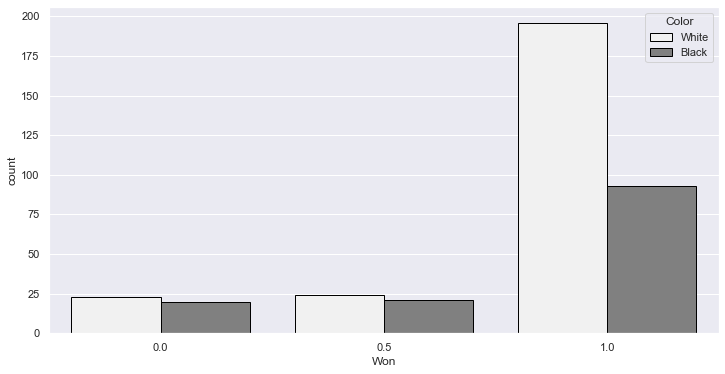

In [337]:
# How many wins/draws as white vs. how many wins/draws as black?
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x = 'Won', hue = 'Color', data=games, color = 'grey', ec = 'black')

Looks like in Morphy's best games, he won about twice as much, playing White, than playing as Black.

In [338]:
# Which opponents did he play the most?
games.Opponent.value_counts()

Johann Lowenthal            27
Jules Arnous de Riviere     25
Adolf Anderssen             24
John W Schulten             18
NN                          17
                            ..
Stoune                       1
Knott                        1
Worrall T                    1
Maude P                      1
Francois Charles Devinck     1
Name: Opponent, Length: 124, dtype: int64

He played Johann Lowenthal, Jules Arnous de Riviere, and Adolf Anderssen the most.

Text(0.5, 1.0, 'Top 10 Players Morphy Lost the Most to')

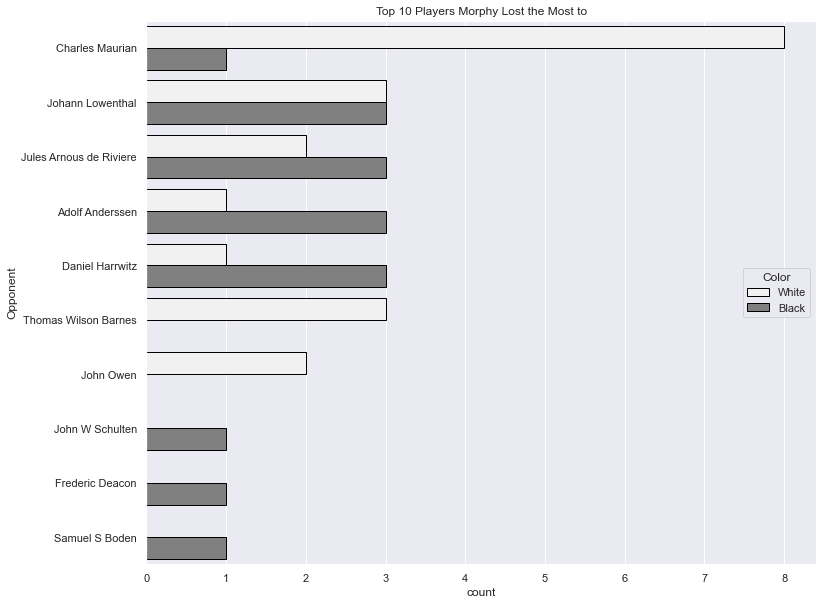

In [339]:
# Who did he lose the most to?
sns.set(rc={'figure.figsize':(12,10)})

sns.countplot(y = 'Opponent', 
              hue = 'Color', 
              data = games[games['Won'] == 0], 
              color = 'grey', 
              ec = 'black',
              order = games[games['Won'] == 0].Opponent.value_counts().iloc[0:10].index
             ).set_title('Top 10 Players Morphy Lost the Most to')

Wow, in this dataset, the opponent Morphy lost the most to is Charles Maurian and he played white in most of those occurences. Considering that Morphy is a strong player as white, it seems he's not as strong of a player against Maurian.

Text(0.5, 1.0, 'Top 10 Opponents Morphy Won the Most Against')

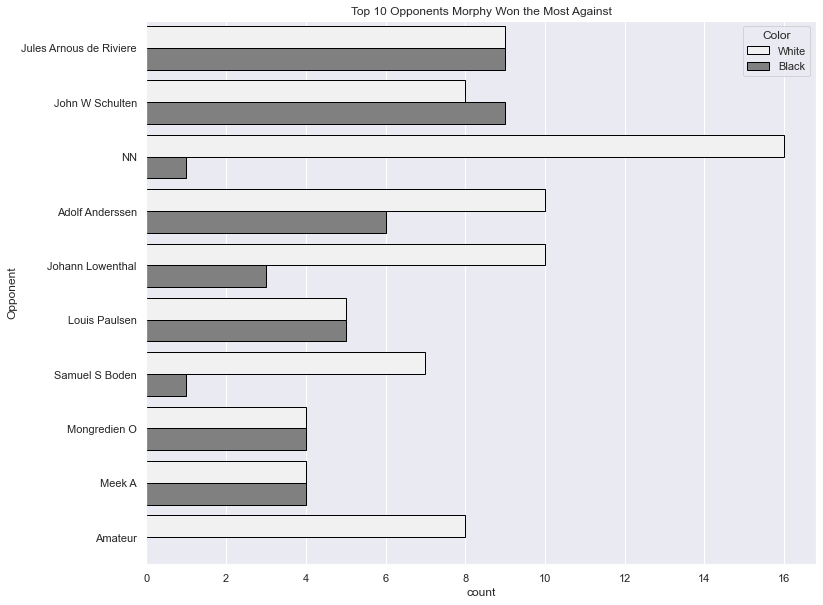

In [340]:
# Who did he win the most against?
# I will limit the number of opponents to a top 10 since Morphy won way more games than he lost in the dataset we have

sns.countplot(y = 'Opponent', 
              hue = 'Color', 
              data = games[games['Won'] == 1], 
              color = 'grey', 
              order = games[games['Won'] == 1].Opponent.value_counts().iloc[0:10].index,
              ec = 'black' 
              ).set_title('Top 10 Opponents Morphy Won the Most Against')

If you compare the two plots above, when played against Jules Arnous de Riviere, Morphy lost more as white, and
won more as black.

Overall, Morphy won the most against Jules Arnous de Riviere, John W Schulten and Johann Lowenthal.
Notice how de Riviere and Lowenthal are part of the top three players that Morphy played the most.

Also, note that Charles Maurian is not in the Top 10 opponents Morphy won against, indicating the Morphy won very little or non at all gainst Maurian.

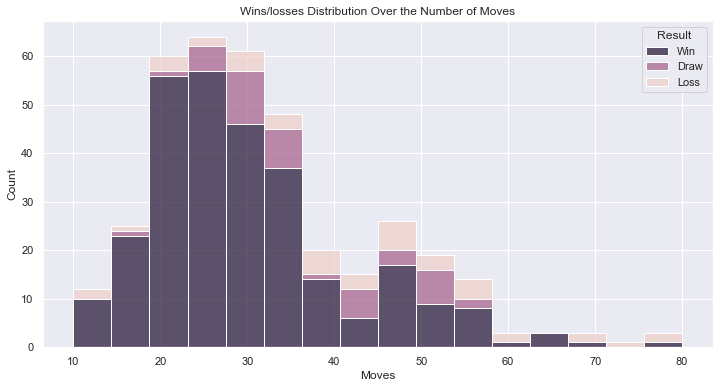

In [352]:
# Number of games and numbers of wins/losses over the years
sns.set_style('white')
sns.set(rc={'figure.figsize':(12,6)})
sns.histplot(x = 'Moves', 
             hue = 'Won',
             multiple= 'stack',
             data = games
            ).set_title('Wins/losses Distribution Over the Number of Moves')
plt.legend(title='Result', labels=['Win', 'Draw', 'Loss'])

Looks like Morphy drawed the most in games that lasted for 30 moves. 
Made more wins within 20-30 moves.
His performance declines a little in games that last beyond 50 moves.

In [342]:
games.corr()

,Moves,Year,Morphy's rating,Opponent's rating,Won
Moves,1.000000,0.056856,NaN,0.441949,-0.343745
Year,0.056856,1.000000,NaN,0.173657,-0.033882
Morphy's rating,NaN,NaN,NaN,NaN,NaN
Opponent's rating,0.441949,0.173657,NaN,1.000000,-0.206505
Won,-0.343745,-0.033882,NaN,-0.206505,1.000000


Indeed, moves has a negative correlation with wins. There also seems to be a slight negative correlation with Opponent's rating and wins. Note: Morphy's rating is NaN in this correlation because his rating is 2690 for all games.

In [343]:
# Get top 10 most occuring openings
top_openings = games['Opening name'].value_counts()[0:10].index
top_opening_games = games[games['Opening name'].isin(top_openings)]

openings_vs_wins = (
    top_opening_games.groupby('Opening name')
    .Won
    .value_counts()
    .unstack()
    )

openings_vs_wins

Won,0.0,0.5,1.0
Opening name,,,
Defense: Exchange Variation,2.0,5.0,12.0
Gambit Accepted: Bishop's Gambit,4.0,1.0,17.0
Gambit Accepted: Ghulam Kassim Gambit,NaN,NaN,8.0
Gambit Accepted: Kieseritzky,2.0,NaN,10.0
Gambit Accepted: Traditional,2.0,NaN,5.0
Gambit Declined: Classical Variation,NaN,NaN,11.0
Game: Knight Attack,1.0,NaN,7.0
Game: Scotch Gambit,1.0,3.0,8.0
López Opening: Morphy Defense,1.0,5.0,9.0


<AxesSubplot:xlabel='Won', ylabel='Opening name'>

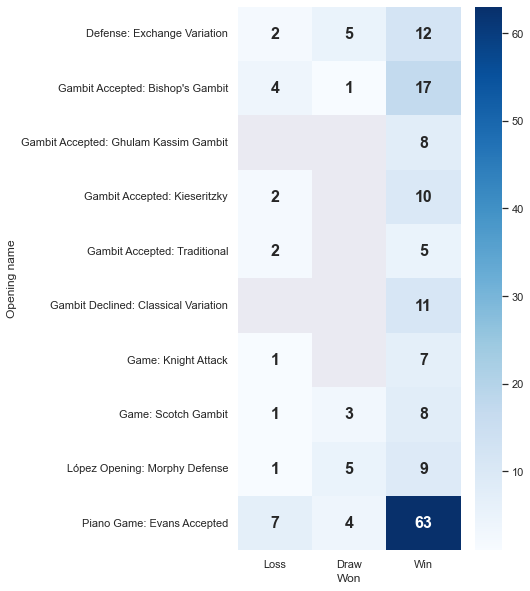

In [344]:
sns.set(rc={'figure.figsize': (5,10)})
sns.heatmap(openings_vs_wins, 
            cmap = 'Blues', 
            annot = True, 
            annot_kws = {'fontsize':16, 'fontweight':'bold'},
            xticklabels = ['Loss', 'Draw', 'Win'])

Most of his winning games opened the Giuoco Piano Game: Evans Gambit. According to the Wikipedia page on Evan's Gambit, "The Evans Gambit is an aggressive line of the Giuoco Piano".

Most of his losses are from this Gambit as well.
Looks like Morphy has never lost/drew in a game that opened with the Classical Variation Gambit Declined and the Ghulam Kassim Gambit Accepted.

In [345]:
# Let's look at Morphy's different first moves as White and it's performance
# To be continued.. Might have to separate the Opening Moves column.